# Session 5: Unsteady-state Heat Conduction

## Session 4 Recap: Steady-State 2D Heat Conduction

- characteristic values
- separation of variables and Fourier transforms
- 2D model in Python

## Discussion of thermal energy storage (Antora)

- describe the technology in brief and what need/problem it is solving
- what mode(s) of heat transfer are likely utilized in the technology? 
- what do you foresee as a benefit to their posed solution, and what might be a challenge? 
- please come up with a few other questions or comments to raise next session 

## Discussion of Slack posts

- everyone comment on your heat transfer topic, what are some major takeaways regarding importance of heat transfer - types, technologies, methods of application, challenges ? 


## Unsteady-state Heat Conduction

- Most real situations are time-dependent, i.e. initial temperature distribution may not be in thermal equilibrium with the boundary temperature 
    e.g. batteries generate their own heat upon charge and discharge, but are also thermally heated and cooled with external coolant fluid in EVs 
- Biot number is a dimensionless value that indicates this - internal heat resistance versus surface resistance. Bi << 1 if surface resistance dominates and internal resistance is low. in other words, heat transfer to the system is instantaneously distributed throughout the entire system such that temperature is immediately uniform throughout 

### Example

Say we have an idealized situation where heat transfer is only in one dimension (x) and y and z directions have no temperature gradients

$$d^2 T/dx^2\ =\ 1/\alpha * dT/dt$$

with B.C.'s $$T(x,0)\ =\ f(x)\\ T(0,t)\ =\ 0\\ T(L,t)\ =\ 0 $$

we assume the existence of some solution via separation of variables, in the form: $$T(x,t)\ =\ e^{-\alpha \lambda ^2 t}(A*sin(\lambda x)+B*cos(\lambda x)) $$

1. apply separation of variables

$$T(x,t)\ =\ X(x)*\Gamma(t) $$

$$\Gamma(t)*d^2X/dx^2\ =\ 1/\alpha * X(x)*dT/dt = $$

$$(1/X(x))*d^2X/dx^2 =  1/(\alpha *\Gamma(t))* dT/dt$$

Set both sides equal to a constant, $$-\lambda^2 $$

2. solve

integrate RHS: $$1/\alpha * ln(\Gamma(t))\ =\ -\lambda^2 * t$$

$$\Gamma(t)\ =\ e^{-\alpha * \lambda^2 t} $$

integrate LHS: $$X"\ +\ \lambda^2*X(x)\ =\ 0 $$

$$X(x)\ =\ A*cos(\lambda x)\ +\ B*sin(\lambda x) $$

3. apply BCs

$$ T(x,t)\ =\ e^{-\alpha  \lambda ^2 t} *(A*sin(\lambda x)\ +\ B*cos(\lambda x))$$


## Finite Difference Method

$$T(x,y,t)\ =\ T_{x,y}^t $$

$$\frac{dT}{dt}\ -\ \alpha * (\frac{d^2T}{dx^2}\ +\ \frac{d^2T}{dy^2})\ =\ 0 $$

$$\frac{T_{x,y}^{t+1}\ -\ T_{x,y}^{t}}{\Delta t}\ -\ \alpha (\frac{T_{x+1,y}^t\ -2*T_{x,y}^t\ +\ T_{x-1,y}^t}{\Delta x^2}\ +\ \frac{T_{x,y+1}^t\ -2*T_{x,y}^t\ +\ T_{x,y-1}^t}{\Delta y^2})\ =\ 0$$

assuming $$\Delta x\ =\ \Delta y $$

$$T_{x,y}^{t+1}\ =\ \alpha \frac{\Delta t}{\Delta x^2}*(T_{x+1,y}^t\ +\ T_{x-1,y}^t\ +\ T_{x,y-1}^t\ +\ T_{x,y+1}^t\ -\ 4T_{x,y}^t)\ +\ T_{x.y}^t $$

In [11]:
## Citation: https://levelup.gitconnected.com/solving-2d-heat-equation-numerically-using-python-3334004aa01a

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

plate_length = 50
max_iter_time = 1000

alpha = 2.0
delta_x = 1

# Calculated params
delta_t = (delta_x ** 2)/(4 * alpha)
gamma = (alpha * delta_t) / (delta_x ** 2)

# Initialize solution: the grid of T(t, x, y)
T = np.empty((max_iter_time, plate_length, plate_length))

# Initial condition everywhere inside the grid
T_initial = 0.0

# Boundary conditions (fixed temperature)
T_top = 100.0
T_left = 0.0
T_bottom = 0.0
T_right = 0.0

# Set the initial condition
T.fill(T_initial)

# Set the boundary conditions
T[:, (plate_length-1):, :] = T_top
T[:, :, :1] = T_left
T[:, :1, 1:] = T_bottom
T[:, :, (plate_length-1):] = T_right


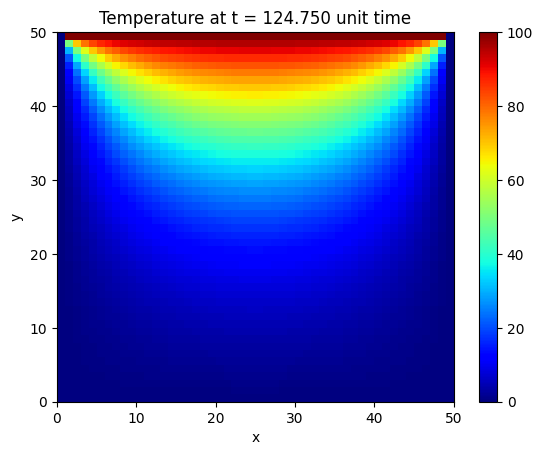

In [13]:
def fdm(T):
  for t in range(0, max_iter_time-1, 1):
    for x in range(1, plate_length-1, delta_x):
      for y in range(1, plate_length-1, delta_x):
        T[t + 1, x, y] = gamma * (T[t][x+1][y] + T[t][x-1][y] + T[t][x][y+1] + T[t][x][y-1] - 4*T[t][x][y]) + T[t][x][y]
  
  return T

def plotheatmap(T, k):
  # Clear the current plot figure
  plt.clf()
  plt.title(f"Temperature at t = {k*delta_t:.3f} unit time")
  plt.xlabel("x")
  plt.ylabel("y")
  
  # This is to plot u_k (u at time-step k)
  plt.pcolormesh(T, cmap=plt.cm.jet, vmin=0, vmax=100)
  plt.colorbar()
  
  return plt

T = fdm(T)
k = 998
plotheatmap(T[k], k)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'values'

Error in callback <function _draw_all_if_interactive at 0x7fb1419b0ca0> (for post_execute):


AttributeError: 'numpy.ndarray' object has no attribute 'values'

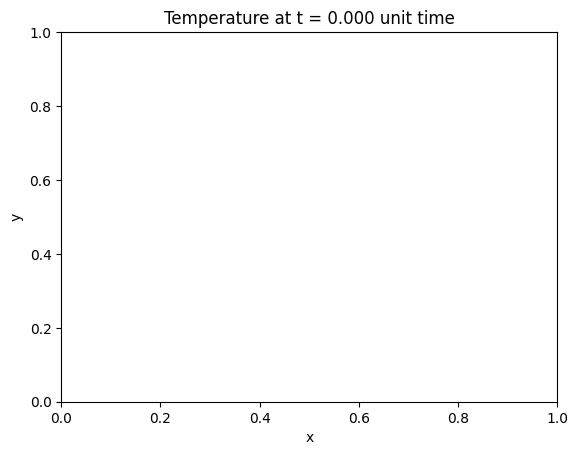

In [7]:
def animate(k):
    plotheatmap(T[k], k)

anim = animation.FuncAnimation(plt.figure(), animate, interval=1, frames=max_iter_time, repeat=False)
anim.save("heat_equation_solution.gif")